# Project question 1 - Which car produced the biggest upset in Formula One?

## 1. Importing the first tools and datasets

In [3]:
import pandas as pd
import numpy as np

results = pd.read_csv("results.csv")
races = pd.read_csv("races.csv")
constructor_results = pd.read_csv("constructor_results.csv")
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


# As a new car formula was introduced in 2014 and the technical changes to the cars were relatively small until 2022, we will first look at data from 2014 to 2021. We will use 2014-2020 as a training dataset and apply it to 2021 - the test dataset

### Preparing training data. First, we take all the results from 2014 to 2020 and do some feature engineering - add the circuit information and other such data that the machine learning algorithm is likely to benefit from

In [4]:
races_2014_2020 = races.loc[(races['year'] > 2013) & (races['year'] < 2021)]
races_2014_2020_circuit_data = pd.concat([races_2014_2020['raceId'], races_2014_2020['circuitId'], races_2014_2020['time']], axis=1)

results_2014_2020 = results.loc[(results['raceId'].isin(races_2014_2020['raceId']))]
results_2014_2020 = pd.merge(results_2014_2020, races_2014_2020_circuit_data, on='raceId')

constructor_results_2014_2020 = constructor_results.loc[(constructor_results['raceId'].isin(races_2014_2020['raceId']))]
constructor_results_2014_2020 = constructor_results_2014_2020.drop(columns=['constructorResultsId','status'])
#results_2014_2020 = pd.merge(results_2014_2020, constructor_results_2014_2020, on=['raceId', 'constructorId'])
results_2014_2020 = results_2014_2020.drop(columns=['resultId','driverId','number','position','positionText','time_x'])
results_2014_2020.replace(r"\N", 0, inplace=True)

## converting fastestLapTime to milliseconds
def find_milliseconds(laptime):
    if str(laptime)!='0':
        minutes, seconds_and_ms = str(laptime).split(':')
        seconds, milliseconds = seconds_and_ms.split('.')
        return int(int(minutes) * 60000 + int(seconds) * 1000 + int(milliseconds))
    else:
        return 0
    
def find_time(time):
    hours, minutes, seconds = str(time).split(':')
    return (int(hours) * 100) + int(minutes)
results_2014_2020['fastestLapTime'] = results_2014_2020['fastestLapTime'].apply(find_milliseconds)
results_2014_2020['time_y'] = results_2014_2020['time_y'].apply(find_time)

results_2014_2020

,raceId,constructorId,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,circuitId,time_y
0,900,131,3,1,25.0,57,5578710,19,1,92478,206.436,1,1,600
1,900,1,4,2,18.0,57,5605487,49,6,93066,205.131,1,1,600
2,900,1,10,3,15.0,57,5608737,39,5,92917,205.460,1,1,600
3,900,6,5,4,12.0,57,5613994,57,7,93186,204.867,1,1,600
4,900,3,15,5,10.0,57,5626349,56,3,92616,206.128,1,1,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,1047,51,14,16,0.0,54,0,29,7,101675,196.650,11,24,1310
2823,1047,3,18,17,0.0,54,0,49,16,102497,195.073,11,24,1310
2824,1047,210,20,18,0.0,54,0,50,13,101999,196.025,11,24,1310
2825,1047,210,17,19,0.0,53,0,50,8,101707,196.588,12,24,1310


### Now, repeat these steps for 2021 - the test data

In [5]:
races_2021 = races.loc[(races['year'] == 2021)]
races_2021_circuit_data = pd.concat([races_2021['raceId'], races_2021['circuitId'], races_2021['time']], axis=1)

results_2021 = results.loc[(results['raceId'].isin(races_2021['raceId']))]
results_2021 = pd.merge(results_2021, races_2021_circuit_data, on='raceId')

constructor_results_2021 = constructor_results.loc[(constructor_results['raceId'].isin(races_2021['raceId']))]
constructor_results_2021 = constructor_results_2021.drop(columns=['constructorResultsId','status'])
#results_2021 = pd.merge(results_2021, constructor_results_2021, on=['raceId', 'constructorId'])
results_2021 = results_2021.drop(columns=['resultId','driverId','number','position','positionText','time_x'])
results_2021.replace(r"\N", 0, inplace=True)

results_2021['fastestLapTime'] = results_2021['fastestLapTime'].apply(find_milliseconds)
results_2021['time_y'] = results_2021['time_y'].apply(find_time)

results_2021

,raceId,constructorId,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,circuitId,time_y
0,1052,131,2,1,25.0,56,5523897,44,4,94015,207.235,1,3,1500
1,1052,9,1,2,18.0,56,5524642,41,2,93228,208.984,1,3,1500
2,1052,131,3,3,16.0,56,5561280,56,1,92090,211.566,1,3,1500
3,1052,1,7,4,12.0,56,5570363,38,6,94396,206.398,1,3,1500
4,1052,9,0,5,10.0,56,5575944,44,3,93970,207.334,1,3,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1073,3,16,16,0.0,50,0,30,15,89293,212.912,3,24,1300
436,1073,51,14,17,0.0,33,0,33,16,89442,212.557,6,24,1300
437,1073,3,17,18,0.0,26,0,23,19,90647,209.732,6,24,1300
438,1073,51,18,19,0.0,25,0,23,18,89698,211.951,23,24,1300


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train = results_2014_2020.copy().drop(columns=['points'])
X_test = results_2021.copy().drop(columns='points')
y_train = results_2014_2020['points']
y_test = results_2021['points']

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)
points_data = pd.concat([y_test, pd.Series(y_pred)], axis=1)
print(points_data)


15.738011231459797
0.6918303946534934
     points          0
0      25.0  17.103128
1      18.0  15.367901
2      16.0  14.960586
3      12.0  11.999644
4      10.0  12.314842
..      ...        ...
435     0.0  -2.360844
436     0.0  -1.525868
437     0.0  -3.079956
438     0.0  -3.541065
439     0.0   1.317683

[440 rows x 2 columns]


As the R-squared score is only 0.69, there are improvements that can be made to the algorithm and features. Firstly, let's try polynomial features

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(mse_poly)
print(r2_poly)
points_data = pd.concat([points_data, pd.Series(y_pred_poly)], axis=1)
print(points_data)

8.653267235719888
0.8305583907794489
     points          0          0
0      25.0  17.103128  22.943432
1      18.0  15.367901  19.006131
2      16.0  14.960586  16.557541
3      12.0  11.999644  12.623810
4      10.0  12.314842  10.729539
..      ...        ...        ...
435     0.0  -2.360844   0.051741
436     0.0  -1.525868   0.019196
437     0.0  -3.079956   0.448669
438     0.0  -3.541065   1.232408
439     0.0   1.317683   1.103409

[440 rows x 3 columns]


As visible above, polynomial feature introduction improved our MSE and R-squared results significantly. Let's try to further improve the score by removing highly correlated features, a simple piece of feature engineering. Let's try to remove 'laps', as it could be highly correlated with circuitId.

In [16]:
X_train_1 = X_train.copy().drop(columns=['laps'])
X_test_1 = X_test.copy().drop(columns=['laps'])

X_train_poly_1 = poly.fit_transform(X_train_1)
X_test_poly_1 = poly.transform(X_test_1)

poly_reg_1 = LinearRegression()
poly_reg_1.fit(X_train_poly_1, y_train)

y_pred_poly_1 = poly_reg_1.predict(X_test_poly_1)

mse_poly_1 = mean_squared_error(y_test, y_pred_poly_1)
r2_poly_1 = r2_score(y_test, y_pred_poly_1)

print(mse_poly_1)
print(r2_poly_1)
points_data = pd.concat([points_data, pd.Series(y_pred_poly_1)], axis=1)
print(points_data)


3.6830332706020714
0.9278816813136678
     points          0          0          0          0
0      25.0  17.103128  22.943432  22.670221  22.670221
1      18.0  15.367901  19.006131  18.955031  18.955031
2      16.0  14.960586  16.557541  16.409846  16.409846
3      12.0  11.999644  12.623810  12.604734  12.604734
4      10.0  12.314842  10.729539  10.760344  10.760344
..      ...        ...        ...        ...        ...
435     0.0  -2.360844   0.051741  -0.274281  -0.274281
436     0.0  -1.525868   0.019196   0.037339   0.037339
437     0.0  -3.079956   0.448669   0.649724   0.649724
438     0.0  -3.541065   1.232408   1.594895   1.594895
439     0.0   1.317683   1.103409   1.466817   1.466817

[440 rows x 5 columns]


In [15]:
mse_r2_scores = pd.DataFrame([[mse, r2],[mse_poly, r2_poly],[mse_poly_1, r2_poly_1]], columns=['MSE (lower is better)','R-squared (higher is better)'])
mse_r2_scores

,MSE (lower is better),R-squared (higher is better)
0,15.738011,0.691830
1,8.653267,0.830558
2,3.683033,0.927882


As visible in the above dataframe, each step so far has only improved the fit of our model. Let us try one more technique - Standardization to normalize our features.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_2 = scaler.fit_transform(X_train_1)
X_test_2 = scaler.transform(X_test_1)

X_train_poly_2 = poly.fit_transform(X_train_2)
X_test_poly_2 = poly.transform(X_test_2)

poly_reg_2 = LinearRegression()
poly_reg_2.fit(X_train_poly_2, y_train)

y_pred_poly_2 = poly_reg_2.predict(X_test_poly_2)

mse_poly_2 = mean_squared_error(y_test, y_pred_poly_2)
r2_poly_2 = r2_score(y_test, y_pred_poly_2)

print(mse_poly_2)
print(r2_poly_2)
points_data = pd.concat([points_data, pd.Series(y_pred_poly_2)], axis=1)
print(points_data)

mse_r2_scores.loc[len(mse_r2_scores)] = [mse_poly_2, r2_poly_2]
mse_r2_scores

3.578730968658327
0.9299240485959126
     points          0          0          0          0          0          0  \
0      25.0  17.103128  22.943432  22.670221  22.670221  22.606309  22.606309   
1      18.0  15.367901  19.006131  18.955031  18.955031  18.864592  18.864592   
2      16.0  14.960586  16.557541  16.409846  16.409846  16.327424  16.327424   
3      12.0  11.999644  12.623810  12.604734  12.604734  12.455353  12.455353   
4      10.0  12.314842  10.729539  10.760344  10.760344  10.819502  10.819502   
..      ...        ...        ...        ...        ...        ...        ...   
435     0.0  -2.360844   0.051741  -0.274281  -0.274281  -0.358979  -0.358979   
436     0.0  -1.525868   0.019196   0.037339   0.037339   0.198599   0.198599   
437     0.0  -3.079956   0.448669   0.649724   0.649724   0.707819   0.707819   
438     0.0  -3.541065   1.232408   1.594895   1.594895   1.601052   1.601052   
439     0.0   1.317683   1.103409   1.466817   1.466817   0.338332   0.3

,MSE (lower is better),R-squared (higher is better)
0,15.738011,0.691830
1,8.653267,0.830558
2,3.683033,0.927882
3,3.578731,0.929924


Standardization alone produced small improvements, but it is often used in conjunction with regularization to improve the results further. Let's try the Lasso technique:

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.7)
lasso.fit(X_train_2, y_train)

y_pred_lasso = lasso.predict(X_test_2)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(mse_lasso)
print(r2_lasso)
points_data = pd.concat([points_data, pd.Series(y_pred_lasso)], axis=1)
print(points_data)

mse_r2_scores.loc[len(mse_r2_scores)] = [mse_lasso, r2_lasso]
mse_r2_scores

14.486931326477235
0.7163280770420235
     points          0          0          0          0          0          0  \
0      25.0  17.103128  22.943432  22.670221  22.670221  22.606309  22.606309   
1      18.0  15.367901  19.006131  18.955031  18.955031  18.864592  18.864592   
2      16.0  14.960586  16.557541  16.409846  16.409846  16.327424  16.327424   
3      12.0  11.999644  12.623810  12.604734  12.604734  12.455353  12.455353   
4      10.0  12.314842  10.729539  10.760344  10.760344  10.819502  10.819502   
..      ...        ...        ...        ...        ...        ...        ...   
435     0.0  -2.360844   0.051741  -0.274281  -0.274281  -0.358979  -0.358979   
436     0.0  -1.525868   0.019196   0.037339   0.037339   0.198599   0.198599   
437     0.0  -3.079956   0.448669   0.649724   0.649724   0.707819   0.707819   
438     0.0  -3.541065   1.232408   1.594895   1.594895   1.601052   1.601052   
439     0.0   1.317683   1.103409   1.466817   1.466817   0.338332   0.

,MSE (lower is better),R-squared (higher is better)
0,15.738011,0.691830
1,8.653267,0.830558
2,3.683033,0.927882
3,3.578731,0.929924
4,14.960038,0.707064
5,14.809283,0.710016
6,14.207823,0.721793
7,14.850581,0.709207
8,14.486931,0.716328


Attempts in rows 4-8 were with the Lasso technique using various alpha values. It is obvious that our features do not benefit from regularization.

Now, to visualize the data from attempt on row 3, our most accurate fit.

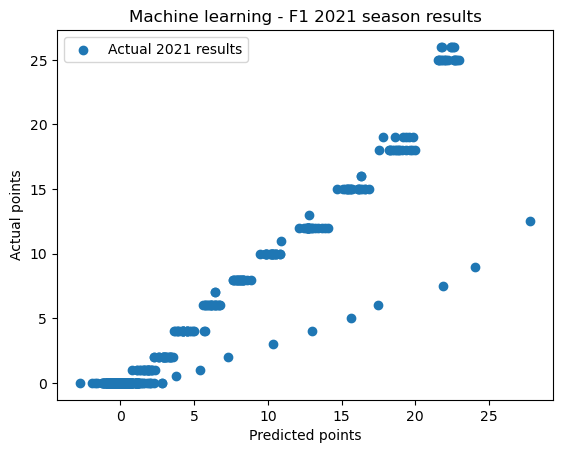

In [36]:
import matplotlib.pyplot as plt

plt.scatter(y_pred_poly_2, y_test, label='Actual 2021 results')
plt.title('Machine learning - F1 2021 season results')
plt.xlabel('Predicted points')
plt.ylabel('Actual points')
plt.legend()
plt.show()

In this graph visualizing general predicted vs actual points earned, a perfect fit would cast perfect diagonal lines. 
Here we can see that the model was generally successful in predicting points, with the exception of one single constructor. 

TODO identify this constructor - the constructor that screwed up the most?
